In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

customers = pd.read_csv("customers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")

**Question 1**

Toplam sipariş sayısı: 99440
---------------------------------------------------------------------------------------------------
Her siparişin toplam tutarı
                                  payment_value
order_id                                       
00010242fe8c5a6d1ba2dd792cb16214          72.19
00018f77f2f0320c557190d7a144bdd3         259.83
000229ec398224ef6ca0657da4fc703e         216.87
00024acbcdf0a6daa1e931b038114c75          25.78
00042b26cf59d7ce69dfabb4e55b4fd9         218.04
...                                         ...
fffc94f6ce00a00581880bf54a75a037         343.40
fffcd46ef2263f404302a634eb57f7eb         386.53
fffce4705a9662cd70adb13d4a31832d         116.85
fffe18544ffabc95dfada21779c9644f          64.71
fffe41c64501cc87c801fd61db3f6244          55.79

[99440 rows x 1 columns]
---------------------------------------------------------------------------------------------------
Siparişlerin ortalama tutarı: 160.99026669347316
--------------------------------------------

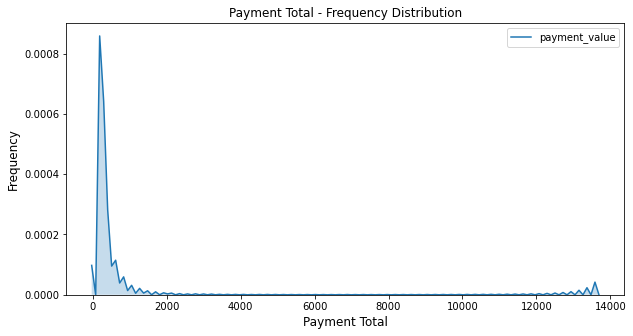

In [2]:
def mean_payments(data):
    #Bazı siparişler taksitli olduğu için bazı order_id'ler birden fazla kez yazılmış
    unique_orders = data["order_id"].unique()
    print("Toplam sipariş sayısı:", len(unique_orders)) 
    #Yukardakı işlem ile unique olarak kaç adet sipariş olduğunu buluyoruz

    print("---------------------------------------------------------------------------------------------------")

    #Aşağıdaki işlemler ile aynı order_id ye sahip siparişleri gruplayarak her gruptaki siparişleri topluyoruz.
    global unique_orders_df
    grouped_unique_id = data[["order_id","payment_value"]].groupby(["order_id"]).agg({"payment_value": "sum"})
    unique_orders_df = pd.DataFrame(data = grouped_unique_id, columns = ("payment_value",))
    print("Her siparişin toplam tutarı")
    print(unique_orders_df)
    
    print("---------------------------------------------------------------------------------------------------")

    #Artık her sparişin ne kadar tuttuğunu biliyoruz, tüm sparişlerin ortalamasını alıyoruz.
    mean_orders = unique_orders_df["payment_value"].mean()
    print("Siparişlerin ortalama tutarı:", mean_orders)
    
    print("---------------------------------------------------------------------------------------------------")
    #Sipariş tutarlarının değerlendirilmesi
    print("Sipariş tutarlarını değerlendirilmesi:")
    print(unique_orders_df.describe().T)
    
    print("---------------------------------------------------------------------------------------------------")
    #Görselleştirme
    print("Payment Value Skewness in a Histogram")
    plt.figure(figsize=(10,5))
    g1 = sns.kdeplot(unique_orders_df["payment_value"], shade = True)
    g1.set_title("Payment Total - Frequency Distribution")
    g1.set_xlabel("Payment Total", fontsize = 12)
    g1.set_ylabel("Frequency", fontsize = 12)
    
mean_payments(order_payments)

Payment Types: ['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
-----------------------------------------------------------------------------------------------------------
              total_payment
payment_type               
boleto         2.869361e+06
credit_card    1.254208e+07
debit_card     2.179898e+05
not_defined    0.000000e+00
voucher        3.794369e+05
Toplam sipariş tutarı: 16008872.119999304
-----------------------------------------------------------------------------------------------------------
Ratio of payment credit_card: %78.34458352834835
Ratio of payment boleto: %17.923569183961348
Ratio of payment voucher: %2.370166162586707
Ratio of payment debit_card: %1.3616811251035814
Ratio of payment not_defined: %0.0
Total: %100.0
----------------------------------------------------------------------------------------------------------
Pie Chart:


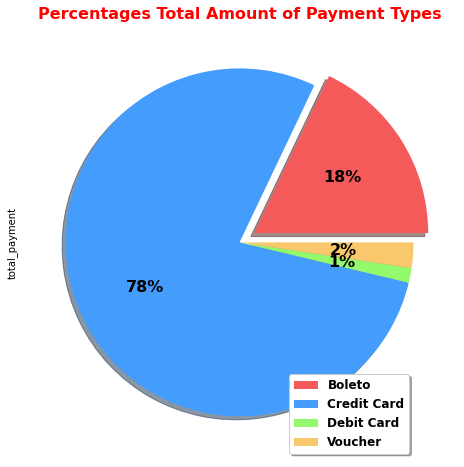

In [6]:
def ratio_of_payments_types(data):    
    #Sipariş türleri
    payments_types = data["payment_type"].unique()
    print(f"Payment Types: {payments_types}")

    print("-----------------------------------------------------------------------------------------------------------")

    #Siparişleri payment_value ve order_id lere göre gruplamak
    grouped_by = data.groupby(by = ["payment_type"]).agg({"payment_value": "sum"})
    grouped_by = grouped_by.rename(columns = {"payment_value": "total_payment"})
    grouped_byDF = pd.DataFrame(data = grouped_by, columns = ("total_payment",))
    print(grouped_byDF)
    total_payment_value = grouped_byDF["total_payment"].sum()
    print(f"Toplam sipariş tutarı: {total_payment_value}")
    
    print("-----------------------------------------------------------------------------------------------------------")

    #Sipariş türlerinin birbirine oranı
    def ratio(types):
        total = 0
        for type in types:
            ratio = (grouped_byDF["total_payment"][type]/total_payment_value)*100
            print(f"Ratio of payment {type}: %{ratio}" )
            total += ratio
        print(f"Total: %{total}")

    ratio(payments_types)

    print("----------------------------------------------------------------------------------------------------------")
    print("Pie Chart:")
    fig, ax = plt.subplots(figsize=(9, 8), subplot_kw=dict(aspect="equal"))
    explode = (0.1, 0, 0, 0)
    colors = ['#f45a5a', '#449dfc', '#93f96d', '#f9c86d']
    legend = ["Boleto","Credit Card", "Debit Card", "Voucher"]
    grouped_byDF = grouped_byDF.reset_index()
    pie_chart = grouped_byDF[grouped_byDF["payment_type"] != "not_defined"]["total_payment"]
    pie_chart.plot(kind="pie", legend=False, labels=None, startangle=0, explode=explode, autopct='%1.0f%%', pctdistance=0.6, shadow=True, textprops={'weight':'bold', 'fontsize':16}, colors=colors, ax=ax)
    ax.legend(legend, loc='best', shadow=True, prop={'weight':'bold', 'size':12}, bbox_to_anchor=(0.6, 0, 0.5,1))
    plt.title("Percentages Total Amount of Payment Types", fontweight='bold', size=16, color = "red")
    
ratio_of_payments_types(order_payments)

                   Order Count
Year Month                    
2016 09-September            4
     10-October            324
     12-December             1
2017 01-January            800
     02-February          1780
     03-March             2682
     04-April             2404
     05-May               3700
     06-June              3245
     07-July              4026
     08-August            4331
     09-September         4285
     10-October           4631
     11-November          7544
     12-December          5673
2018 01-January           7269
     02-February          6728
     03-March             7211
     04-April             6939
     05-May               6873
     06-June              6167
     07-July              6292
     08-August            6512
     09-September           16
     10-October              4
-----------------------------------------------------------------------------------
Bar Chart


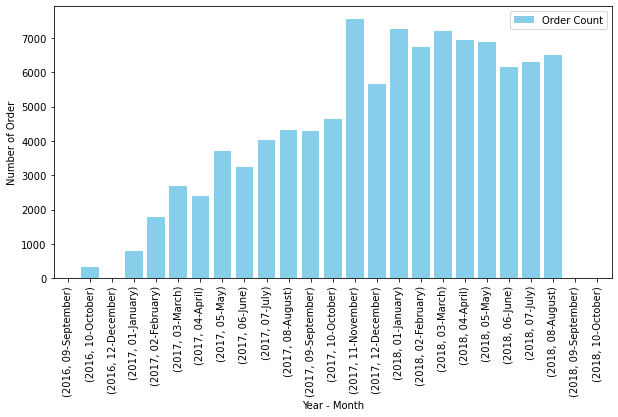

In [3]:
def orders_by_months(data):
    #Tarih formatını belirliyorum, data isimli veriyi orders_date olarak alıyorum
    orders_date = data.copy()
    orders_date["order_purchase_timestamp"] = pd.to_datetime(orders_date["order_purchase_timestamp"], format = "%Y-%m-%d %H:%M:%S")
    
    #orders_date verisi üzerinde yıllara ve aylara göre gruplandırma yapıyorum, elde ettiğim veri setini grouped_by_date olarak isimlendiriyorum
    grouped_by_date = orders_date.groupby([orders_date["order_purchase_timestamp"].dt.strftime("%Y").rename("Year"), 
                                           orders_date["order_purchase_timestamp"].dt.strftime("%m-%B").rename("Month")]).agg({"order_id": "count"})
    

    #Sipariş sayılarını içeren sütunu order_count olarak isimlendiriyorum
    grouped_by_date = grouped_by_date.rename(columns = {"order_id": "Order Count"})
    print(grouped_by_date)

    print("-----------------------------------------------------------------------------------")

    #Görselleştirme
    print("Bar Chart")
    grouped_by_date.plot.bar(width= 0.80, color="#87CEEB", figsize=(10,5))
    plt.ylabel("Number of Order")
    plt.xlabel("Year - Month")
orders_by_months(orders)

In [5]:
def orders_by_sellers(*data):
    items , seller = data
    #Satıcı sayısı
    countSeller = seller["seller_id"].count()
    seller_states = sellers["seller_state"].unique()

    ################################################################################################################################
    
    #Her satıcının kaç adet ürün sattığını, toplamda ne kadarlık ürün sattığını ve ne kadarlık kargo parası ödediğini içeren data frame
    grouped_items = items.groupby("seller_id").agg({"order_id": "count",
                                                    "price": "sum",
                                                    "freight_value": "sum"})
    grouped_items = grouped_items.rename(columns = {"order_id":"order_count"})

    grouped_sellers = pd.merge(grouped_items, seller, on = "seller_id", how = "outer")
    grouped_sellers = grouped_sellers.drop(["seller_zip_code_prefix"], axis = 1)

    ################################################################################################################################

    #Eyaletlerde toplam kaç satıcı olduğunu, bu satıcıların toplamda ne kadar ürün sattığın, toplam ürün fiyatını içeren data frame
    grouped_by_city = grouped_sellers.groupby("seller_state").agg({"seller_id": "count",
                                                                   "order_count": "sum",
                                                                   "price": "sum"})
    grouped_by_city = grouped_by_city.rename(columns = {"seller_id":"seller_count", "price": "total_price"})
    
    return countSeller, seller_states ,grouped_sellers, grouped_by_city
    
countSeller, seller_states ,grouped_sellers, grouped_by_city = orders_by_sellers(order_items, sellers)

**Kaç tane satıcı var**

In [6]:
print(f"Satıcı sayısı: {countSeller}")

Satıcı sayısı: 3095


**Satıcıların Olduğu Eyaletler**

In [41]:
print(f"Satıcıların olduğu eyaletler: {seller_states}")

Satıcıların olduğu eyaletler: ['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']


**Satıcıların ne kadar ürün sattığını, sattıkları ürünlerin toplam değerini, ne kadar taşıma ücreti ödendiğini, satıcıların hangi şehirden ve eyaletten olduğunu içeren dataframe**

In [67]:
grouped_sellers

,index,seller_id,order_count,price,freight_value,seller_city,seller_state
0,0,0015a82c2db000af6aaaf3ae2ecb0532,3,2685.00,63.06,santo andre,SP
1,1,001cca7ae9ae17fb1caed9dfb1094831,239,25080.03,8854.14,cariacica,ES
2,2,001e6ad469a905060d959994f1b41e4f,1,250.00,17.94,sao goncalo,RJ
3,3,002100f778ceb8431b7a1020ff7ab48f,55,1234.50,793.66,franca,SP
4,4,003554e2dce176b5555353e4f3555ac8,1,120.00,19.38,goiania,GO
...,...,...,...,...,...,...,...
3090,3090,ffcfefa19b08742c5d315f2791395ee5,1,69.90,9.62,curitiba,PR
3091,3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,20,2101.20,727.46,curitiba,PR
3092,3092,ffeee66ac5d5a62fe688b9d26f83f534,14,1839.86,419.69,mirassol,SP
3093,3093,fffd5413c0700ac820c7069d66d98c89,61,9062.30,2833.74,amparo,SP


**Hangi eyalette ne kadar satıcı olduğu, o eyalette toplamda ne kadar ürün satıldığı, bu ürünlerin toplam değerini içeren dataFrame**

In [66]:
grouped_by_city

,seller_count,order_count,total_price
seller_state,,,
AC,1,1,267.00
AM,1,3,1177.00
BA,19,643,285561.56
CE,13,94,20240.64
DF,30,899,97749.48
ES,23,372,47689.61
GO,40,520,66399.21
MA,1,405,36408.95
MG,244,8827,1011564.74


**En Çok Satış Yapan 10 Satıcı**

Text(0.5, 1.0, 'Top 10 - Sellers')

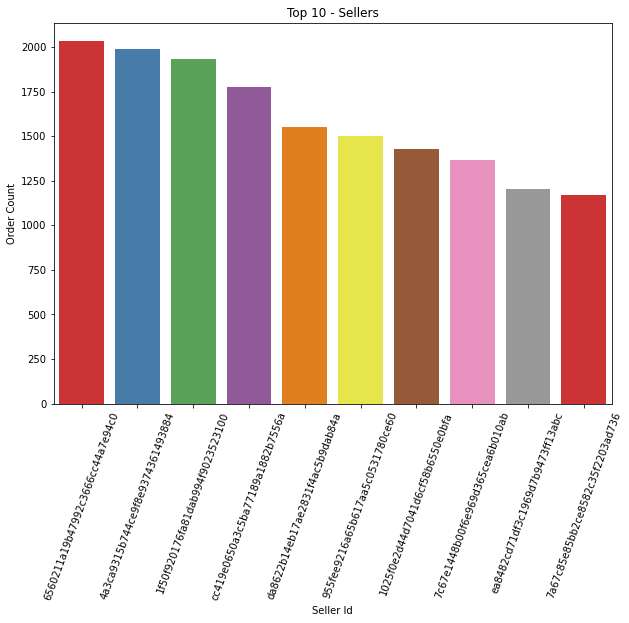

In [52]:
grouped_sellers = grouped_sellers.reset_index()
plt.figure(figsize=(10,7))
seller = sns.barplot(x = 'seller_id', y = 'order_count',data = grouped_sellers.sort_values(by = "order_count", ascending = False).head(10), palette=sns.color_palette(palette="Set1"))
seller.set_xlabel('Seller Id')
seller.set_xticklabels(seller.get_xticklabels(), rotation = 70)
seller.set_ylabel('Order Count')
seller.set_title("Top 10 - Sellers")

**Eyaletlerdeki Satıcı Sayısı**

Text(0.5, 1.0, 'Number of Sellers in States')

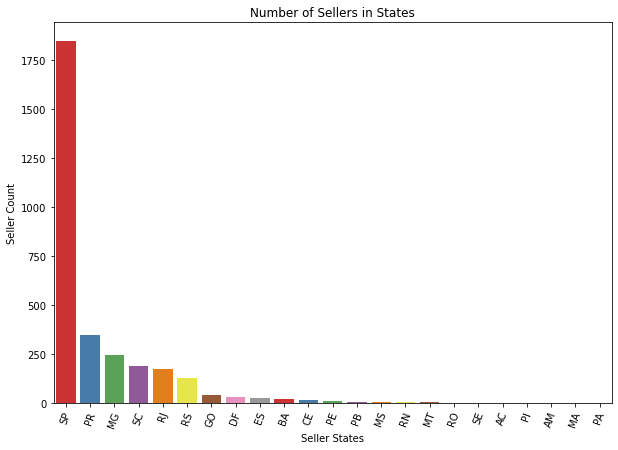

In [26]:
grouped_by_city = grouped_by_city.reset_index()
plt.figure(figsize=(10,7))
seller = sns.barplot(x = 'seller_state', y = 'seller_count',data = grouped_by_city.sort_values(by = "seller_count", ascending = False), palette=sns.color_palette(palette="Set1"))
seller.set_xlabel('Seller States')
seller.set_xticklabels(seller.get_xticklabels(), rotation = 70)
seller.set_ylabel('Seller Count')
seller.set_title("Number of Sellers in States")

Text(0, 0.5, 'Frequency')

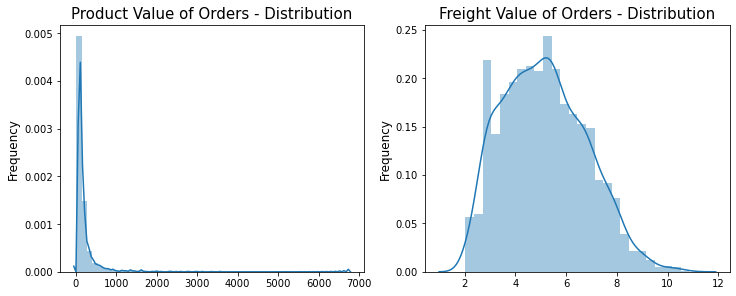

In [163]:
plt.figure(figsize=(12,10))

plt.subplot(221)
g = sns.distplot(grouped_sellers["price"]/grouped_sellers["order_count"])
g.set_title("Product Value of Orders - Distribution", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Frequency", fontsize=12)

plt.subplot(222)
g1 = sns.distplot(np.log(grouped_sellers["freight_value"] + 1))
g1.set_title("Freight Value of Orders - Distribution", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Frequency", fontsize=12)

In [90]:
def category_sales(*data):
    #products dosyasını product_id ve product_category_name sütunlarına ulaşmak için,
    #order_items dosyasını product_id, order_id ve price sütunlarına ulaşmak için,
    #product_category dosyasını ise ingilizce category sütununa ulaşmak için aktive ediyorum.
    productDF, categoryDF, itemsDF = data
    
    #order_items dosyasını itemsDF olarak adlandırdırıktan sonra product_id lere göre grupluyorum.
    #order_id'ler satılarn ürünlerimi temsil ettiğinden count ile kaç adet sipariş olduğunu buluyorum
    #price ile o üründen ne kadarlık satıldığını sum ile hesaplıyorum
    grouped_items = itemsDF.groupby("product_id").agg({"order_id": "count",
                                                       "price": "sum"})
    grouped_items = grouped_items.rename(columns = {"order_id": "order_count", "price": "total_price"})

    #product(productDF), order_items(grouped_items) data frameleri product_id üzerinden merge ederek satılan ürünlerin kategorilerini belirtiyorum
    mergedDF = pd.merge(productDF[["product_id", "product_category_name"]], grouped_items, on = "product_id", how = "outer")

    #mergedDF ile product_category verisini birleştirerek data frame'e ingilizce kategori isimlerini de ekliyorum
    global wide_mergedDF
    wide_mergedDF = pd.merge(mergedDF, categoryDF, on = "product_category_name", how = "outer")
    
    wide_mergedDF = wide_mergedDF.rename(columns = {"product_category_name_english":"Product Category"})
    #Son olarak product_category_name_english sütununa göre order_count ve total_price sütunlarını topluyorum, her kategoriden ne kadar ürün satıldığını buluyorum.

    grouped_by_category = wide_mergedDF.groupby("Product Category").agg({"order_count": "sum",
                                                                         "total_price": "sum"})
    
    return grouped_by_category

grouped_by_category = category_sales(products, product_category, order_items)


**Hangi kategoriden kaç adet ürün satıldığını ve bu ürünlerin toplam değerini veren data frame**

In [91]:
grouped_by_category

,order_count,total_price
Product Category,,
agro_industry_and_commerce,212,72530.47
air_conditioning,297,55024.96
art,209,24202.64
arts_and_craftmanship,24,1814.01
audio,364,50688.50
...,...,...
stationery,2517,230943.23
tablets_printing_image,83,7528.41
telephony,4545,323667.53


**En ucuz ve en pahalı kategorileri bulmak için grouped_by_category veri setine ortalama ürün fiyarı sütunu ekliyorum**

In [92]:
grouped_by_category = grouped_by_category.reset_index()
grouped_by_category["mean_price_products"] = grouped_by_category["total_price"] / grouped_by_category["order_count"]
grouped_by_category

,Product Category,order_count,total_price,mean_price_products
0,agro_industry_and_commerce,212,72530.47,342.124858
1,air_conditioning,297,55024.96,185.269226
2,art,209,24202.64,115.802105
3,arts_and_craftmanship,24,1814.01,75.583750
4,audio,364,50688.50,139.254121
...,...,...,...,...
66,stationery,2517,230943.23,91.753369
67,tablets_printing_image,83,7528.41,90.703735
68,telephony,4545,323667.53,71.213978
69,toys,4117,483946.60,117.548360


**En Ucuz Kategori**

In [94]:
min_category = grouped_by_category[grouped_by_category["mean_price_products"] == grouped_by_category["mean_price_products"].min()]
print("En ucuz Kategori:")
min_category


En ucuz Kategori:


,Product Category,order_count,total_price,mean_price_products
46,home_comfort_2,30,760.27,25.342333


**En Pahalı Kategori**

In [95]:
max_category = grouped_by_category[grouped_by_category["mean_price_products"] == grouped_by_category["mean_price_products"].max()]
print("En ucuz Kategori:")
max_category

En ucuz Kategori:


,Product Category,order_count,total_price,mean_price_products
14,computers,203,222963.13,1098.340542


**Ürün Kategorilerinde Satışı Gösteren Grafik**

Text(0.5, 1.0, 'Number of Products Sold in Categories')

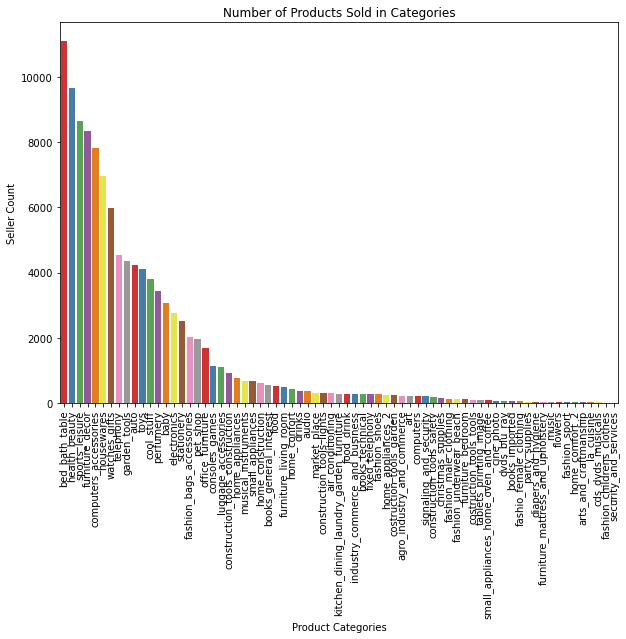

In [97]:
plt.figure(figsize=(10,7))
seller = sns.barplot(x = 'Product Category', y = 'order_count',data = grouped_by_category.sort_values(by = "order_count", ascending = False), palette=sns.color_palette(palette="Set1"))
seller.set_xlabel('Product Categories')
seller.set_xticklabels(seller.get_xticklabels(), rotation = 90)
seller.set_ylabel('Seller Count')
seller.set_title("Number of Products Sold in Categories")

In [110]:
def order_state(data):
    #Siparişlerin durumlarını belirtten kategorileri ve hangi durumda kaç sipariş var buluyorum
    orderDF = data.copy()
    states = orderDF.groupby("order_status")["order_id"].nunique().sort_values(ascending = False)

    ##########################################################################################################################

    #Karşılaştırma yapılacak işlemler için sadece teslim edilen siparişlerden oluşan bir data frame oluşturuyorum
    delivered_orders = orderDF[orderDF["order_status"] == "delivered"]
    #Daha sonra bu data frame'in tarih içeren sütunlarının formatını belirliyorum
    delivered_orders["order_purchase_timestamp"] = pd.to_datetime(delivered_orders["order_purchase_timestamp"], format = "%Y-%m-%d %H:%M:%S")
    delivered_orders["order_approved_at"] = pd.to_datetime(delivered_orders["order_approved_at"], format = "%Y-%m-%d %H:%M:%S")
    delivered_orders["order_delivered_carrier_date"] = pd.to_datetime(delivered_orders["order_delivered_carrier_date"], format = "%Y-%m-%d %H:%M:%S")
    delivered_orders["order_delivered_customer_date"] = pd.to_datetime(delivered_orders["order_delivered_customer_date"], format = "%Y-%m-%d %H:%M:%S")
    delivered_orders["order_estimated_delivery_date"] = pd.to_datetime(delivered_orders["order_estimated_delivery_date"], format = "%Y-%m-%d %H:%M:%S")

    #Sipariş ödemesi yapıldıktan sonra siparişin tahmini teslimat tarihi oluşuyor, bu yüzden ödeme tarihi, müşteriye teslim tarihi ve tahmini teslimat tarihini aldım.
    purchase_dates = delivered_orders["order_purchase_timestamp"].dt.strftime("%Y-%m-%d")
    delivered_dates = delivered_orders["order_delivered_customer_date"].dt.strftime("%Y-%m-%d")
    estimates_dates = delivered_orders["order_estimated_delivery_date"].dt.strftime("%Y-%m-%d")

    #Eksik satırları düzenliyorum
    purchase_dates = purchase_dates.reset_index(drop = True)
    delivered_dates = delivered_dates.reset_index(drop = True)
    estimates_dates = estimates_dates.reset_index(drop = True)

    #Ödeme tarihi ve tahmini teslimat arasındaki gün farkı ile ödeme tarihi ve müşteri teslimat tarihi arasındaki gün farkını karşılaştırdım.
    difference_estimate = (pd.to_datetime(estimates_dates) - pd.to_datetime(purchase_dates))
    difference_delivered = (pd.to_datetime(delivered_dates) - pd.to_datetime(purchase_dates))
    describe_estimate = difference_estimate.describe().T
    describe_delivered = difference_delivered.describe().T
    for i in range(len(difference_delivered)):
        difference_delivered[i] = difference_delivered[i].days
        difference_estimate[i] = difference_estimate[i].days
    
    return describe_estimate ,describe_delivered, states, difference_delivered, difference_estimate

describe_estimate ,describe_delivered ,states, difference_delivered, difference_estimate = order_state(orders)

**Siparişlerin durumu**

In [99]:
print("Siparişlerin durumu:")
states

Siparişlerin durumu:


order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Tahmini Teslimat Tarihi İnceleme** 

*Ödeme yapıldıktan sonra tahmini teslimat tarihi oluşur, bu tarih ile ödeme tarihi arasındaki gün farkı*

In [111]:
describe_estimate

count                      96478
mean     24 days 08:56:45.443728
std       8 days 18:11:43.673103
min              3 days 00:00:00
25%             19 days 00:00:00
50%             24 days 00:00:00
75%             29 days 00:00:00
max            156 days 00:00:00
dtype: object

**Gerçek Teslimat Tarihi İnceleme**

*Ödeme tarihi ile siparişin müşteriye ulaşma tarihi arasındaki fark*;

In [136]:
describe_delivered

count                      96470
mean     12 days 11:55:27.732973
std       9 days 13:19:18.156788
min              0 days 00:00:00
25%              7 days 00:00:00
50%             10 days 00:00:00
75%             16 days 00:00:00
max            210 days 00:00:00
dtype: object

**Tahimini teslimat zamanı ile gerçek teslimat zamanının karşılaştırılması**

Text(0.5, 1.0, 'Compare with Estimate and Actual Date')

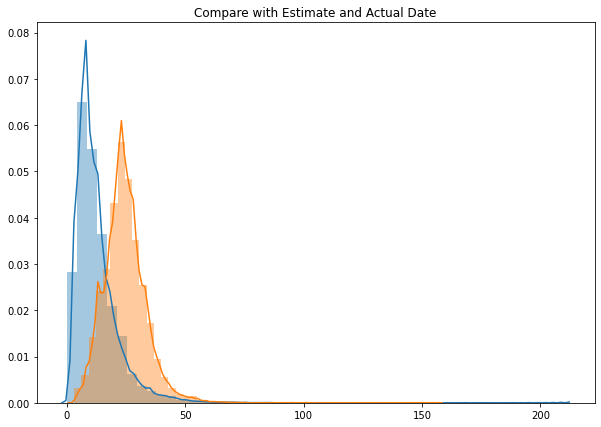

In [172]:
plt.figure(figsize=(10,7))
sns.distplot(difference_delivered, kde = True) #Mavi
sns.distplot(difference_estimate, kde = True)  #Turuncu
plt.title("Compare with Estimate and Actual Date")

In [175]:
def reviews(*data):
    #Veri setini temizleme
    reviews, items, productDF = data
    merged_scoreDF = reviews.merge(items, on = "order_id", how = "outer")
    merged_scoreDF = merged_scoreDF.merge(productDF, on = "product_id", how = "outer")
    merged_scoreDF = merged_scoreDF[merged_scoreDF["review_score"].isnull() == False]

    #Score değerlerini değerlendirme
    merged_scoreDF = merged_scoreDF.groupby(["product_category_name","product_id"]).agg({"review_score": "mean"})
    merged_scoreDF = merged_scoreDF.rename(columns = {"review_score": "review_scores_mean"})
    return merged_scoreDF


merged_scoreDF = reviews(order_reviews, order_items, products)

**Kategorilerdeki Siparişlerin Ortalama Puanını İçeren Data Frame**

In [165]:
merged_scoreDF

review_scores_mean
product_category_name     product_id                                          
agro_industria_e_comercio 018ca97302e4293050cc41413194bb19                 1.0
                          026f43af35e7951067097527d5c31bcc                 4.0
                          07f01b6fcacc1b187a71e5074199db2d                 5.0
                          0a0adf0de1769b2970f3096d0b5abfb7                 5.0
                          0a27862bbf658a5b8cf655761bc5c72d                 5.0
...                                                                        ...
utilidades_domesticas     ff95ac47246ef13e48712ea1ff8df0d9                 1.0
                          ffaaddefb271481c66d4bd79844ecdae                 5.0
                          ffbc83054b3741a8d67fc59d9cf9d42d                 1.0
                          ffc88104d219c1b767d566fd93653dd2                 3.0
                          ffe0fc4e02c3559643ac063fa5cf9d07                 5.0

[32184 rows x 1 columns]

**Kategorilerin Ortalama Puanı**

Text(0.5, 1.0, 'Average of Category Scores')

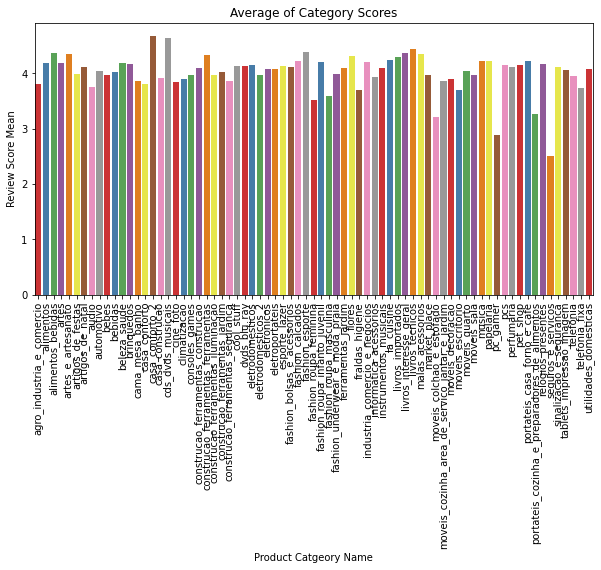

In [179]:
merged_scoreDF = merged_scoreDF.reset_index()
merged_scoreDF = merged_scoreDF.groupby("product_category_name").agg({"review_scores_mean": "mean"})
merged_scoreDF = merged_scoreDF.reset_index()
plt.figure(figsize=(10,5))
seller = sns.barplot(x = 'product_category_name', y = 'review_scores_mean', data = merged_scoreDF, palette=sns.color_palette(palette="Set1"))
seller.set_xlabel('Product Catgeory Name')
seller.set_xticklabels(seller.get_xticklabels(), rotation = 90)
seller.set_ylabel('Review Score Mean')
seller.set_title("Average of Category Scores")